In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
path = '/home/guillaume/code/GGIML/vivadata-student/data/dogs_cats/train'

In [3]:
num_train_images = np.arange(1000)

In [4]:
num_test_images = np.arange(1000, 1200)

In [5]:
train_cats = []
for num in num_train_images:
    image = tf.keras.preprocessing.image.load_img(f'{path}/cat.{num}.jpg', target_size=(200,200), interpolation='nearest')
    arr = tf.keras.preprocessing.image.img_to_array(image)
    train_cats.append(list(arr))
train_cats = np.array(train_cats)

In [6]:
train_dogs = []
for num in num_train_images:
    image = tf.keras.preprocessing.image.load_img(f'{path}/dog.{num}.jpg', target_size=(200,200), interpolation='nearest')
    arr = tf.keras.preprocessing.image.img_to_array(image)
    train_dogs.append(list(arr))
train_dogs = np.array(train_dogs)

In [7]:
test_cats = []
for num in num_test_images:
    image = tf.keras.preprocessing.image.load_img(f'{path}/cat.{num}.jpg',  target_size=(200,200), interpolation='nearest')
    arr = tf.keras.preprocessing.image.img_to_array(image)
    test_cats.append(list(arr))
test_cats = np.array(test_cats)

In [8]:
test_dogs = []
for num in num_test_images:
    image = tf.keras.preprocessing.image.load_img(f'{path}/dog.{num}.jpg', target_size=(200,200), interpolation='nearest')
    arr = tf.keras.preprocessing.image.img_to_array(image)
    test_dogs.append(list(arr))
test_dogs = np.array(test_dogs)

In [9]:
print(train_cats.shape, train_dogs.shape, test_cats.shape, test_dogs.shape)

(1000, 200, 200, 3) (1000, 200, 200, 3) (200, 200, 200, 3) (200, 200, 200, 3)


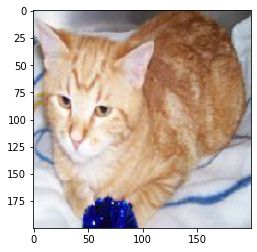

In [10]:
plt.imshow(train_cats[42].astype(np.uint8))

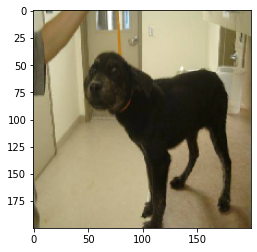

In [11]:
plt.imshow(train_dogs[42].astype(np.uint8))

## Create X and y

In [12]:
X_train = np.concatenate((train_cats, train_dogs), axis=0)

In [13]:
X_train.shape

(2000, 200, 200, 3)

In [14]:
y_train = np.concatenate((np.zeros(1000,), np.ones(1000,)))

In [15]:
y_train.shape

(2000,)

In [16]:
X_test = np.concatenate((test_cats, test_dogs), axis=0)

In [17]:
y_test = np.concatenate((np.zeros(200,), np.ones(200,)))

## Rescaling features

In [18]:
X_train = X_train/255.

In [19]:
X_test = X_test/255.

## CNN

In [20]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, GlobalMaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

In [21]:
def dognet():
    model = Sequential()
    model.add(Conv2D(filters = 6, kernel_size = (3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.01), input_shape = (200, 200, 3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(filters = 12, kernel_size = (3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))
    return model
    

In [22]:
model = dognet()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 12)        660       
_________________________________________________________________
flatten (Flatten)            (None, 112908)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               28904704  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 28,905,789
Trainable params: 28,905,789
Non-trainable params: 0
____________________________________________

In [24]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [25]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

In [26]:
callbacks = [EarlyStopping(monitor='val_loss', patience=20),
            TensorBoard(log_dir='./log')]

In [27]:
model.fit(X_train, y_train, validation_split=.2, batch_size=64, epochs=1000, callbacks=callbacks)

Epoch 1/1000
 1/25 [>.............................] - ETA: 0s - loss: 5.9725 - accuracy: 0.3594WARNING:tensorflow:From /home/guillaume/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
25/25 [==============================] - 16s 653ms/step - loss: 4.4204 - accuracy: 0.5431 - val_loss: 3.4423 - val_accuracy: 0.0000e+00
Epoch 2/1000
25/25 [==============================] - 17s 667ms/step - loss: 2.3211 - accuracy: 0.6131 - val_loss: 2.3767 - val_accuracy: 0.0000e+00
Epoch 3/1000
25/25 [==============================] - 17s 676ms/step - loss: 1.5605 - accuracy: 0.6275 - val_loss: 1.6114 - val_accuracy: 0.1025
Epoch 4/1000
25/25 [==============================] - 17s 664ms/step - loss: 1.2876 - accuracy: 0.6475 - val_loss: 1.3217 - val_accuracy: 0.4375
Epoch 5/100

KeyboardInterrupt: 

## CNN (ResNet50_V2 Transfer)

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(200,200,3))

In [ ]:
base_model.summary()

In [ ]:
x = base_model.output

In [ ]:
x = GlobalAveragePooling2D()(x)

In [ ]:
x = Dense(1024, activation='relu')(x)

In [ ]:
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.fit(X_train, y_train, validation_split=.2, batch_size=64, epochs=5)

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc)